# Исследование индустрии видеоигр

## Описание проекта

Интернет-магазин компьютерных игр хочет узнать закономерности, определяющие успешность игры, для планирования рекламной кампании на 2017 год. Данные представлены до 2016 года. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).

## Обзор данных

In [1]:
!pip install -U kaleido
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
pio.renderers.default='notebook'
import numpy as np
from scipy import stats as st
import warnings

     ---------------------------------------- 65.9/65.9 MB 4.9 MB/s eta 0:00:00


Открывем датафрейм и изучаем общую информацию

In [2]:
try:
    data = pd.read_csv('/datasets/games.csv')
except:
    data = pd.read_csv('C:\\Users\\Дмитрий\\Desktop\\Проекты Я.Практикум\\games\\games.csv')

In [3]:
display(data)
data.info()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
data['Critic_Score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

In [5]:
data['User_Score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [6]:
data['Rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [7]:
data['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [8]:
data['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

**Выводы**

* В названиях столбцов содержатся прописные буквы, необходимо свести к нижнему регистру. Это упростит работу с таблицей.

* В столбце с годом выпуска значения имеют вещественную форму. Это нелогично, поэтому нужно привести их к целому.

* Столбец user_score содержит текстовое значение 'tbd'. Необходимо перевести столбец в вещественную форму (т.к. оценки содержат дробную часть), а значения 'tbd' заменить на NaN.

* В столбцах critic_score, user_score и rating высокое количество пропусков (более 40 %). Заменять их медианой или средним нецелесообразно, т.к. можно исказить данные. Пропуски могли возникнуть из-за отсутствия информации о рейтингах. Например, из таблицы видно, что чаще всего рейтинг отсутствует у игр, выпущенных давно (раньше 2005 года) и у малопопулярных игр, что логично, т.к. пользователей было слишком мало для составления достоверного рейтинга.

## Предобработка данных

In [9]:
data.columns = data.columns.str.lower()

In [10]:
display(data)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Приводим данные к правильному типу

In [11]:
data['year_of_release'] = data['year_of_release'].astype('Int64')
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


Рассчитываем суммарные продажи

In [13]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [14]:
display(data)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


## Исследовательский анализ данных

### Исследуем количество выпускаемых игр по годам

In [15]:
print(data.pivot_table(index='year_of_release',
                       values='name', 
                       aggfunc='count').describe())

              name
count    37.000000
mean    444.432432
std     451.604334
min       9.000000
25%      36.000000
50%     338.000000
75%     762.000000
max    1427.000000


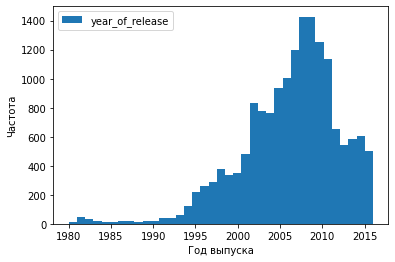

In [16]:
data.plot(kind='hist',y='year_of_release', bins=37)
plt.xlabel('Год выпуска')
plt.ylabel('Частота')
plt.show()

До 1990 года игры практически не выпускались, этими данными можно пренебречь. После 1990 количество выпускаемых игр стало стремительно расти и достигло максимума в 2008-2009 годах. В последующие годы произошло снижение, вероятно, из-за популярности мобильных игр. Среднее количество выпускаемых игр в год равняется 444, медианное - 338.

### Исследуем платформы

Определяем наиболее популярные платформы

In [17]:
display(data.pivot_table(index='platform', 
                         values='total_sales',
                         aggfunc='sum').
                         sort_values(by='total_sales', 
                         ascending=False).head(20))

,total_sales
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12
PS,730.86
GBA,317.85
PS4,314.14
PSP,294.05


Создаем сводную таблицу для изучения продаж в зависимости от платформы и года

In [18]:
data_pivot = data.pivot_table(index='year_of_release', 
                              columns='platform', 
                              values='total_sales', 
                              aggfunc='sum')

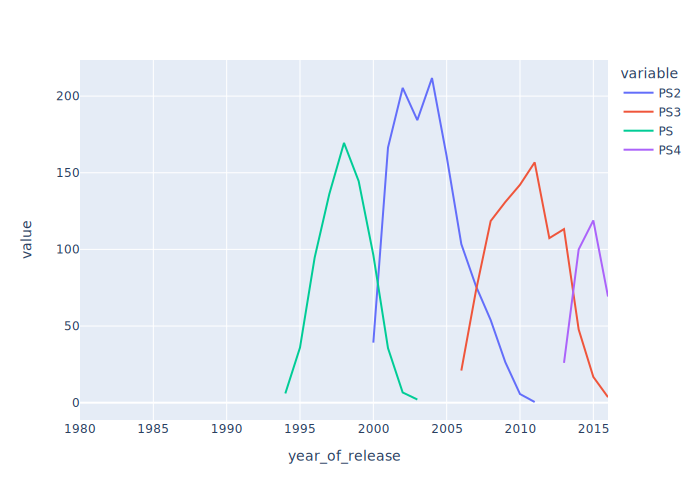

In [19]:
fig = px.line(data_pivot,  x=data_pivot.index, y=['PS2', 'PS3', 'PS', 'PS4'])
fig.show("svg")

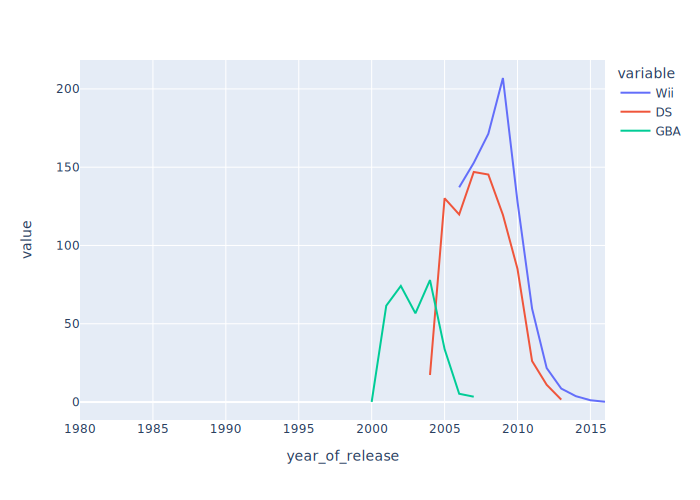

In [20]:
fig = px.line(data_pivot, x=data_pivot.index, y=['Wii', 'DS', 'GBA'])
fig.show('svg')

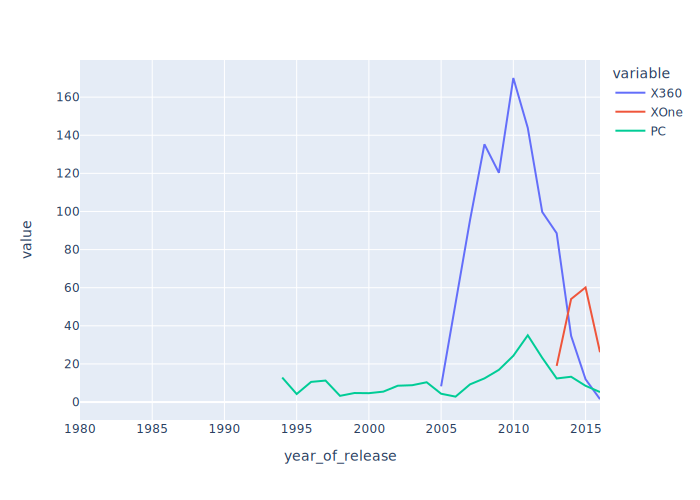

In [21]:
fig = px.line(data_pivot, x=data_pivot.index, y=['X360', 'XOne','PC'])
fig.show('svg')

**Вывод**

* Наибольшее число игр было продано на следующих платформах (по убыванию): PS2, X360, PS3, Wii, DS, PS, GBA, PS4, PSP, PC.

* Большинство платформ имеет продолжительность жизни 9-11 лет: популярность платформы растет первые 4-5 лет, а потом падает из-за появления платформы следующего поколения (проиллюстрировано на примере PlayStation)

* В качестве актуального периода примем 2013-н.в., т.к. в этот год на рынок вышли наиболее популярные на данный момент платформы.

### Исследуем актуальный период

Делаем срез по актуальному периоду

In [22]:
data_actual = data.query('year_of_release >= 2013')
display(data_actual)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


Определяем популярные платформы за актуальный период

In [23]:
display(data_actual.pivot_table(index='platform', 
                                values='total_sales', 
                                aggfunc='sum').
                                sort_values(
                                by='total_sales',
                                ascending=False).head(15))

,total_sales
platform,
PS4,314.14
PS3,181.43
XOne,159.32
3DS,143.25
X360,136.80
WiiU,64.63
PC,39.43
PSV,32.99
Wii,13.66


In [24]:
data_actual_pivot = data_actual.pivot_table(index='year_of_release',
                                            columns='platform', 
                                            values='total_sales',
                                            aggfunc='sum')

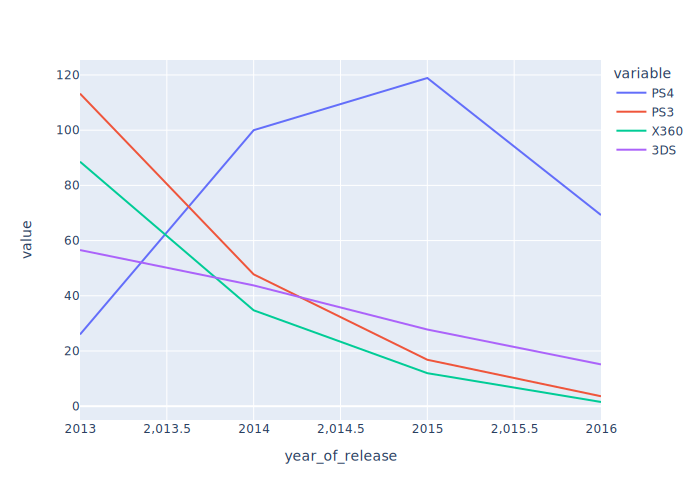

In [25]:
fig = px.line(data_actual_pivot, x=data_actual_pivot.index, y=['PS4','PS3', 'X360', '3DS'])
fig.show('svg')

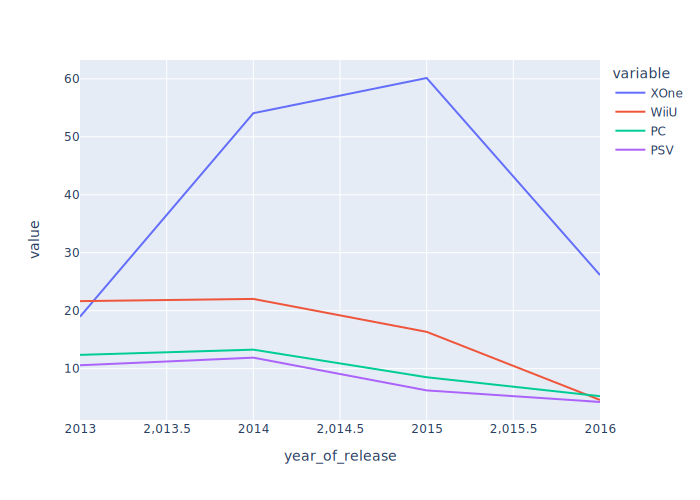

In [26]:
fig = px.line(data_actual_pivot, x=data_actual_pivot.index, y=['XOne','WiiU', 'PC', 'PSV'])
fig.show('svg')

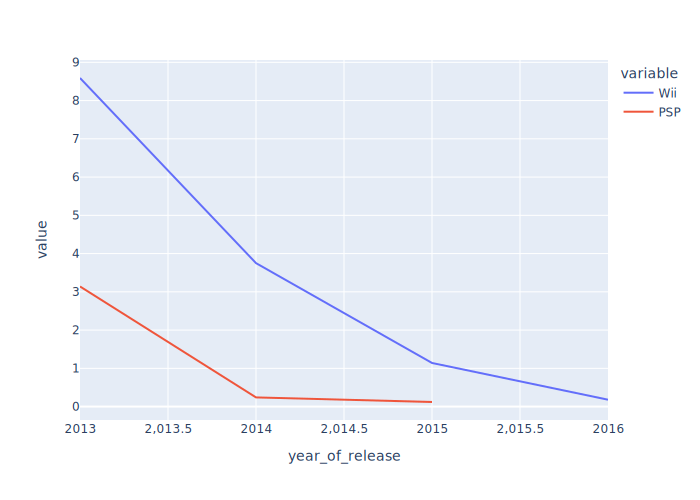

In [27]:
fig = px.line(data_actual_pivot, x=data_actual_pivot.index, y=['Wii','PSP'])
fig.show('svg')

**Вывод**

* За актуальный период по продажам лидируют следующие платформы (по убыванию): PS4, PS3, XOne, 3DS, X360, WiiU, PC, PSV, Wii, PSP.

* Все платформы из топ-10 имеют нисходящий тренд. 

* PS4 и XOne, несмотря на нисходящий тренд, сохраняют высокое количество количество продаж - 69.25 и 26.15 млн копий, соответственно. Скорее всего, ближайшие 3-4 года эти платформы будут прибыльными.

Строим boxplot для сравнения продаж с разных платформ

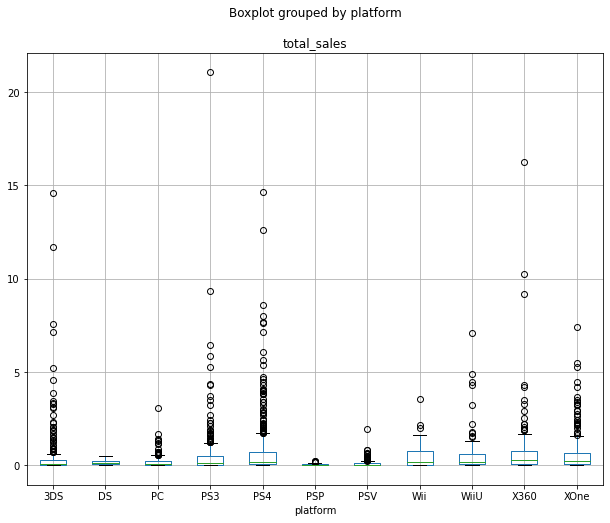

In [28]:
data_actual.boxplot(column='total_sales', by='platform', figsize=(10, 8))
plt.show()
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning) 

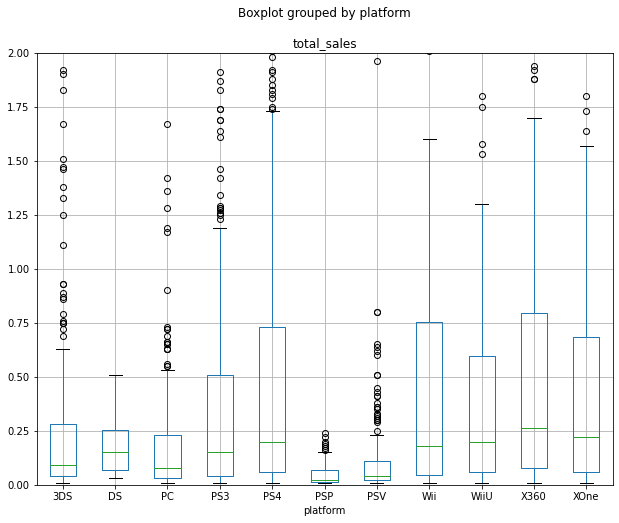

In [29]:
data_actual.boxplot(column='total_sales', by='platform', figsize=(10, 8))
plt.ylim([0, 2])
plt.show()

**Вывод**

* Больше всего выбросов имеют следующие платформы: PS4, PS3, 3DS, XOne.
* Наиболее высокие медианы продаж наблюдаем у следующих платформ (по убыванию): X360, XOne, PS4, WiiU, Wii. 
* Наибольший межквартильный размах и длину правого уса имеют X360, PS4, Wii, XOne, WiiU, PS3.

Исходя из медианы, межквартильного размаха и длины усов, делаем вывод, что игры для платформ X360, XOne, PS4, WiiU, Wii имеют продажи выше остальных. Если принять в расчет выбросы, то видим, что "взрывные" продажи чаще встречались на PS4, PS3 и XOne.

### Исследуем зависимость продаж от оценок критиков и пользователей

Делаем срез по платформе PS4

In [30]:
data_actual_ps4 = data_actual.query('platform == "PS4"')

Строим матрицу корреляции и диаграмму рассеяния

,total_sales,critic_score,user_score
total_sales,1.000000,0.406568,-0.031957
critic_score,0.406568,1.000000,0.557654
user_score,-0.031957,0.557654,1.000000


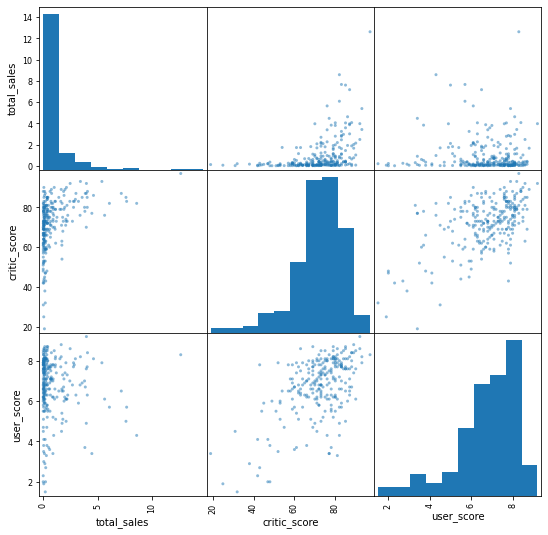

In [31]:
display(data_actual_ps4[['total_sales', 'critic_score', 'user_score']].corr())
pd.plotting.scatter_matrix(data_actual_ps4[['total_sales', 'critic_score', 'user_score']], figsize=(9,9))                  
plt.show()

**Вывод**

* Обнаружена корреляция между продажами и оценками критиков (0.41). Из диаграммы рассеяния видно, что игры с высокими продажами имеют оценку критиков не ниже 60.

* При исследовании зависимости продаж от оценки пользователей на матрице явной корреляции не обнаружено (исходя из матрицы корреляции). Однако из диаграммы рассеяния видно, что популярные игры чаще имеют высокую оценку среди пользователей. Но встречаются также популярные игры с низкими оценками. Поэтому оценку пользователей не стоит использовать как достоверный показатель.

,total_sales,critic_score,user_score
total_sales,1.000000,0.416998,-0.068925
critic_score,0.416998,1.000000,0.472462
user_score,-0.068925,0.472462,1.000000


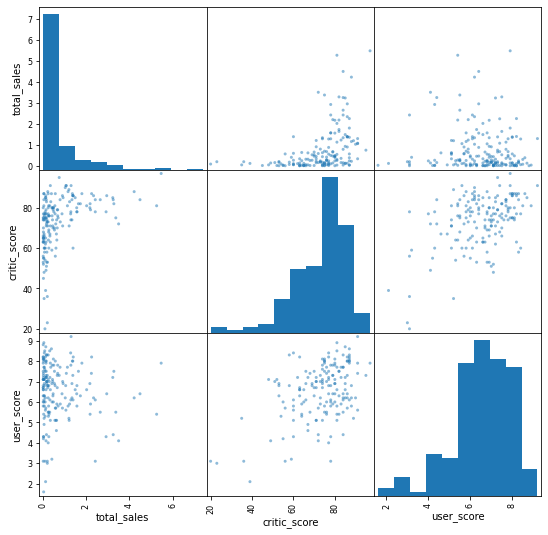

In [32]:
data_actual_xone = data_actual.query('platform == "XOne"')
display(data_actual_xone[['total_sales', 'critic_score', 'user_score']].corr())
pd.plotting.scatter_matrix(data_actual_xone[['total_sales', 'critic_score', 'user_score']], figsize=(9,9))                  
plt.show()

,total_sales,critic_score,user_score
total_sales,1.000000,0.357057,0.241504
critic_score,0.357057,1.000000,0.769536
user_score,0.241504,0.769536,1.000000


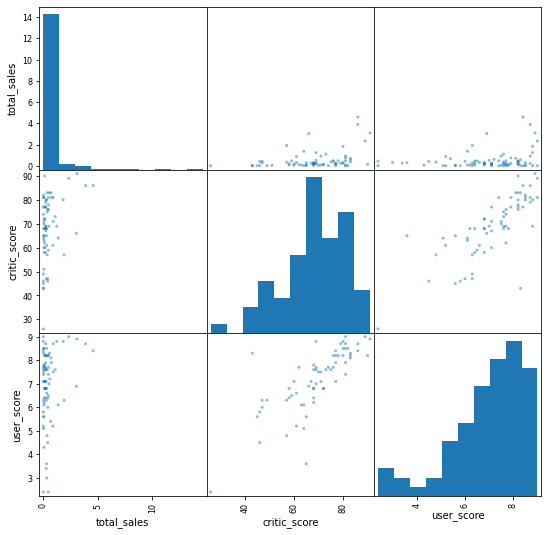

In [33]:
data_actual_3ds = data_actual.query('platform == "3DS"')
display(data_actual_3ds[['total_sales', 'critic_score', 'user_score']].corr())
pd.plotting.scatter_matrix(data_actual_3ds[['total_sales', 'critic_score', 'user_score']], figsize=(9,9))                  
plt.show()

,total_sales,critic_score,user_score
total_sales,1.000000,0.350345,-0.011742
critic_score,0.350345,1.000000,0.520946
user_score,-0.011742,0.520946,1.000000


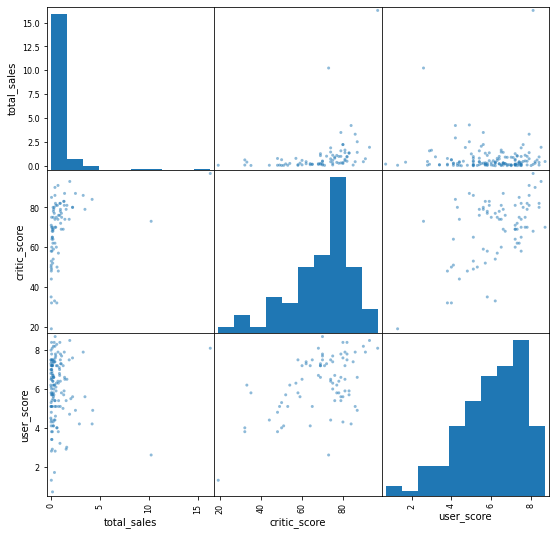

In [34]:
data_actual_x360 = data_actual.query('platform == "X360"')
display(data_actual_x360[['total_sales', 'critic_score', 'user_score']].corr())
pd.plotting.scatter_matrix(data_actual_x360[['total_sales', 'critic_score', 'user_score']], figsize=(9,9))                  
plt.show()

Исследование других платформ подтвердило, что сильнее всего продажи коррелируют с оценкой критиков (0.3-0.4) и совсем немного с оценкой пользователей (0-0.2).

### Исследуем распределение продаж по жанрам

Определяем количество выпущенных игр по жанрам и строим столбчатую диаграмму 

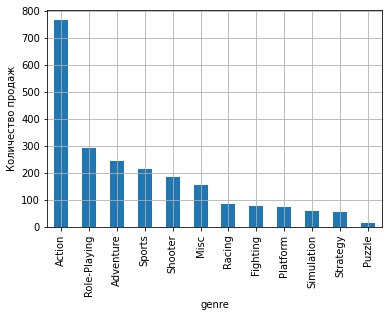

genre
Action          766
Role-Playing    292
Adventure       245
Sports          214
Shooter         187
Misc            155
Racing           85
Fighting         80
Platform         74
Simulation       62
Strategy         56
Puzzle           17
Name: total_sales, dtype: int64

In [35]:
data_actual.groupby('genre')['total_sales'].count().sort_values(ascending=False).plot(kind='bar',
                                                                                      x='genre', 
                                                                                      y='total_sales', 
                                                                                      grid=True)
plt.ylabel('Количество продаж')
plt.show()
display(data_actual.groupby('genre')['total_sales'].count().sort_values(ascending=False))

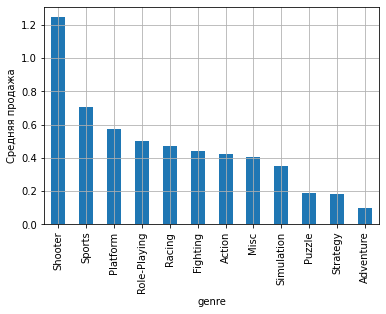

genre
Shooter         1.245882
Sports          0.703972
Platform        0.576081
Role-Playing    0.499623
Racing          0.469294
Fighting        0.441375
Action          0.420196
Misc            0.405290
Simulation      0.350968
Puzzle          0.186471
Strategy        0.180000
Adventure       0.096490
Name: total_sales, dtype: float64

In [36]:
data_actual.groupby('genre')['total_sales'].mean().sort_values(ascending=False).plot(kind='bar',
                                                                                     x='genre',
                                                                                     y='total_sales', 
                                                                                     grid=True)
plt.ylabel('Средняя продажа')
plt.show()
display(data_actual.groupby('genre')['total_sales'].mean().sort_values(ascending=False))

**Вывод**

* Больше всего выпускают игры следующих жанров (по убыванию): Action, Role-Playing, Adventure, Sports, Shooter.

* Самый прибыльный жанр - Shooter. Также высокие средние показатели продаж имеют Platform и Sports.

* Наименее прибыльные жанры (по возрастанию продаж): Adventure, Puzzle, Strategy.

## Составляем портрет пользователя для каждого региона

### NA

Создаем сводную таблицу для NА и определяем долю рынка каждой платформы

In [37]:
na_platform = data_actual.pivot_table(index='platform', values='na_sales', aggfunc=['count','sum'])
na_platform.columns = ['number_of_games', 'total_sales']
na_platform['share'] = na_platform['total_sales']/ na_platform['total_sales'].sum()
display(na_platform.sort_values(by='total_sales', ascending=False))

,number_of_games,total_sales,share
platform,,,
PS4,392,108.74,0.248429
XOne,247,93.12,0.212744
X360,186,81.66,0.186562
PS3,345,63.50,0.145073
3DS,303,38.20,0.087272
WiiU,115,29.21,0.066734
PC,189,11.11,0.025382
Wii,23,6.56,0.014987
PSV,358,5.04,0.011514


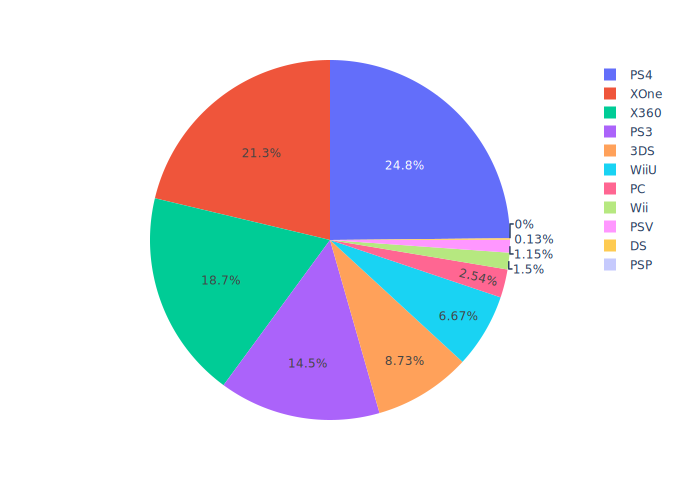

In [38]:
fig = px.pie(na_platform, values=na_platform['share'], names=na_platform.index)
fig.show('svg')

Определяем долю рынка по жанрам в NA

,number_of_games,total_sales,share
genre,,,
Action,766,126.05,0.287976
Shooter,187,109.74,0.250714
Sports,214,65.27,0.149117
Role-Playing,292,46.40,0.106006
Misc,155,27.49,0.062804
Platform,74,18.14,0.041443
Fighting,80,15.55,0.035526
Racing,85,12.96,0.029609
Adventure,245,7.14,0.016312


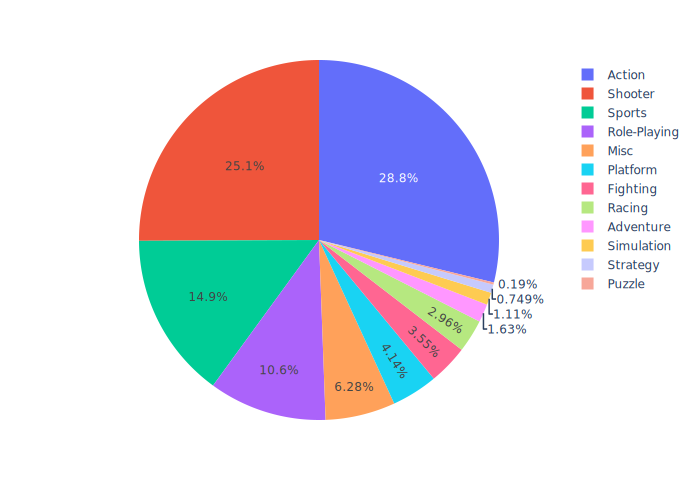

In [39]:
na_genre = data_actual.pivot_table(index='genre', values='na_sales', aggfunc=['count','sum'])
na_genre.columns = ['number_of_games', 'total_sales']
na_genre['share'] = na_genre['total_sales']/ na_genre['total_sales'].sum()
display(na_genre.sort_values(by='total_sales', ascending=False))
fig = px.pie(na_genre, values=na_genre['share'], names=na_genre.index)
fig.show('svg')

Определяем долю рынка по возрастной группе в NA

,number_of_games,total_sales,share
rating,,,
M,369,165.21,0.474346
E,302,79.05,0.226966
E10+,252,54.24,0.155732
T,333,49.79,0.142956


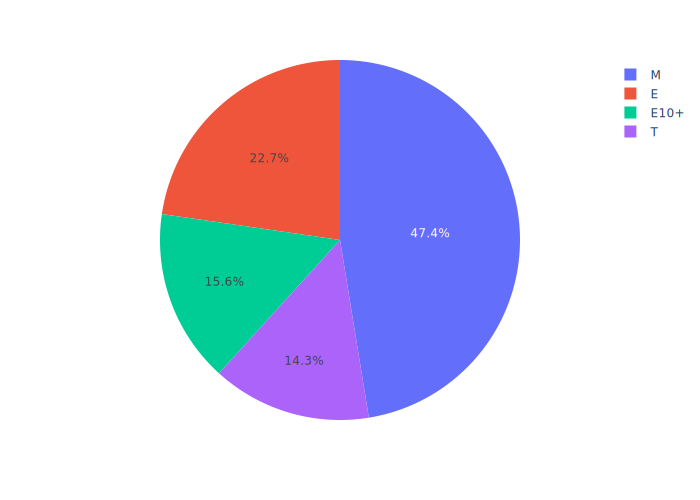

In [40]:
na_rating = data_actual.pivot_table(index='rating', values='na_sales', aggfunc=['count','sum'])
na_rating.columns = ['number_of_games', 'total_sales']
na_rating['share'] = na_rating['total_sales']/ na_rating['total_sales'].sum()
display(na_rating.sort_values(by='total_sales', ascending=False))
fig = px.pie(na_rating, values=na_rating['share'], names=na_rating.index)
fig.show('svg')

**Выводы по Северной Америке**

* Наиболее популярными платформами являются PS4 (25% рынка), XOne (21%), X360 (19%), PS3 (15%), 3DS (9%).

* 29% от всех продаж имеют игры жанра Action, жанр Shooter занимает 25% рынка. Далее идут жанры Sports и Role-Playing - 15 и 11% рынка, соответственно. 5-е место занимает жанр Misc (6%). Наименее популярные жанры: Puzzle, Strategy, Simulation, Adventure и Racing (каждый занимает менее 3% рынка).

* Наиболее популярны игры с рейтингом M (для взрослых), они занимают 47% рынка Северной Америки. На втором месте по продажам игры для всех возрастов (E), - 23% рынка. Далее следуют игры 10+ (E10+), - 16% и игры для тинейджеров (T), - 14%.

### EU

,number_of_games,total_sales,share
platform,,,
PS4,392,141.09,0.359712
PS3,345,67.81,0.172883
XOne,247,51.59,0.131530
X360,186,42.52,0.108406
3DS,303,30.96,0.078933
PC,189,25.36,0.064656
WiiU,115,19.85,0.050608
PSV,358,6.10,0.015552
Wii,23,5.93,0.015119


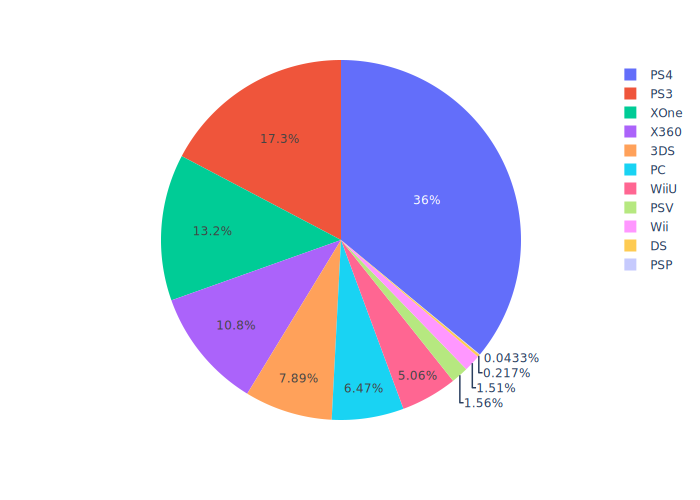

In [41]:
eu_platform = data_actual.pivot_table(index='platform', values='eu_sales', aggfunc=['count','sum'])
eu_platform.columns = ['number_of_games', 'total_sales']
eu_platform['share'] = eu_platform['total_sales']/ eu_platform['total_sales'].sum()
display(eu_platform.sort_values(by='total_sales', ascending=False))
fig = px.pie(eu_platform, values=eu_platform['share'], names=eu_platform.index)
fig.show('svg')

,number_of_games,total_sales,share
genre,,,
Action,766,118.13,0.301175
Shooter,187,87.86,0.224001
Sports,214,60.52,0.154297
Role-Playing,292,36.97,0.094256
Racing,85,20.19,0.051475
Misc,155,20.04,0.051092
Platform,74,15.58,0.039722
Simulation,62,10.92,0.027841
Fighting,80,8.55,0.021798


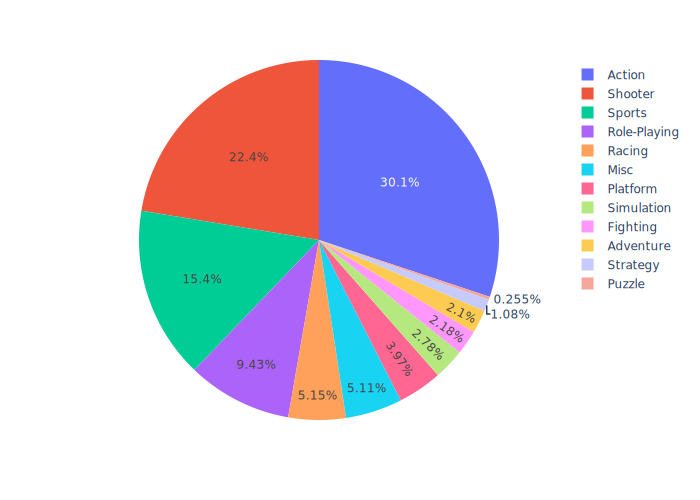

In [42]:
eu_genre = data_actual.pivot_table(index='genre', values='eu_sales', aggfunc=['count','sum'])
eu_genre.columns = ['number_of_games', 'total_sales']
eu_genre['share'] = eu_genre['total_sales']/ eu_genre['total_sales'].sum()
display(eu_genre.sort_values(by='total_sales', ascending=False))
fig = px.pie(eu_genre, values=eu_genre['share'], names=eu_genre.index)
fig.show('svg')

,number_of_games,total_sales,share
rating,,,
M,369,145.32,0.463807
E,302,83.36,0.266054
E10+,252,42.69,0.136250
T,333,41.95,0.133889


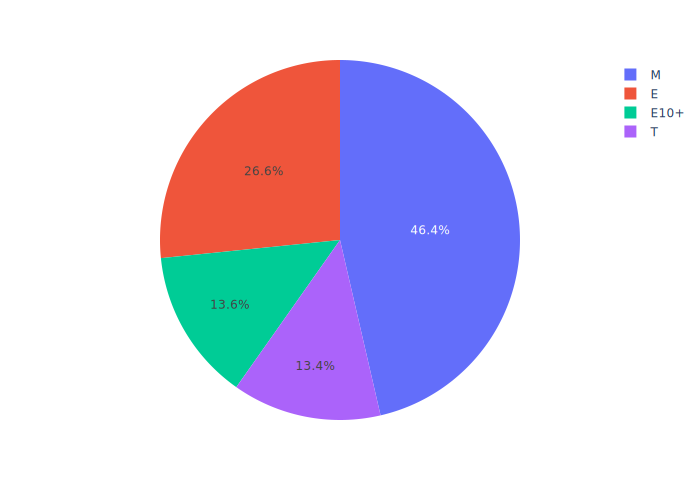

In [43]:
eu_rating = data_actual.pivot_table(index='rating', values='eu_sales', aggfunc=['count','sum'])
eu_rating.columns = ['number_of_games', 'total_sales']
eu_rating['share'] = eu_rating['total_sales']/ eu_rating['total_sales'].sum()
display(eu_rating.sort_values(by='total_sales', ascending=False))
fig = px.pie(eu_rating, values=eu_rating['share'], names=eu_rating.index)
fig.show('svg')

**Выводы по Европе**

* Наиболее популярные платформы: PS4 (36% рынка), PS3  (17%), XOne (13%), X360 (11%), 3DS (8%).

* Самый популярный жанр - Action (30% рынка). Далее идут Shooter (22%), Sports (15%), Role-Playing (9%) и Racing (5%).

* Зависимость продаж от возрастной категории примерно такая же, как в Северной Америке: M - 46%, E - 27%, E10+ - 14%, T - 13%.

### JP

,number_of_games,total_sales,share
platform,,,
3DS,303,67.81,0.481674
PS3,345,23.35,0.165862
PSV,358,18.59,0.132050
PS4,392,15.96,0.113368
WiiU,115,10.88,0.077284
PSP,67,3.29,0.023370
X360,186,0.51,0.003623
XOne,247,0.34,0.002415
Wii,23,0.05,0.000355


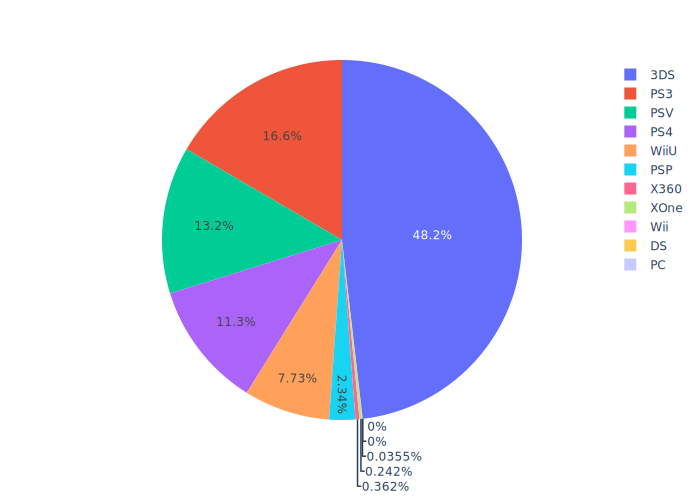

In [44]:
jp_platform = data_actual.pivot_table(index='platform', values='jp_sales', aggfunc=['count','sum'])
jp_platform.columns = ['number_of_games', 'total_sales']
jp_platform['share'] = jp_platform['total_sales']/ jp_platform['total_sales'].sum()
display(jp_platform.sort_values(by='total_sales', ascending=False))
fig = px.pie(jp_platform, values=jp_platform['share'], names=jp_platform.index)
fig.show('svg')

,number_of_games,total_sales,share
genre,,,
Role-Playing,292,51.04,0.362551
Action,766,40.49,0.287612
Misc,155,9.20,0.065350
Fighting,80,7.65,0.054340
Shooter,187,6.61,0.046953
Adventure,245,5.82,0.041341
Sports,214,5.41,0.038429
Platform,74,4.79,0.034025
Simulation,62,4.52,0.032107


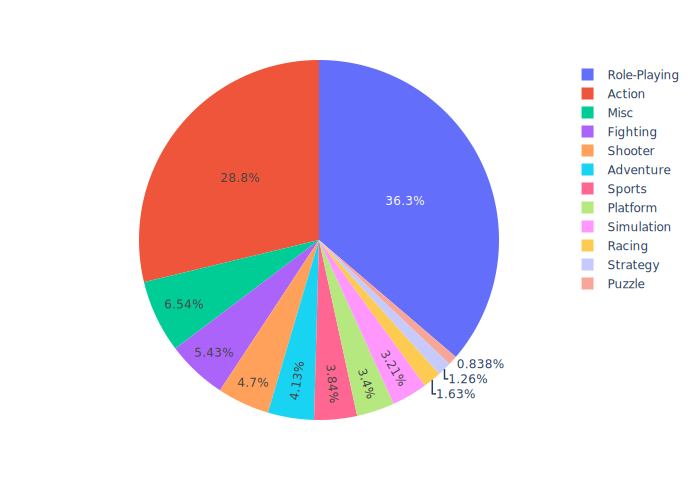

In [45]:
jp_genre = data_actual.pivot_table(index='genre', values='jp_sales', aggfunc=['count','sum'])
jp_genre.columns = ['number_of_games', 'total_sales']
jp_genre['share'] = jp_genre['total_sales']/ jp_genre['total_sales'].sum()
display(jp_genre.sort_values(by='total_sales', ascending=False))
fig = px.pie(jp_genre, values=jp_genre['share'], names=jp_genre.index)
fig.show('svg')

,number_of_games,total_sales,share
rating,,,
T,333,20.59,0.369460
E,302,15.14,0.271667
M,369,14.11,0.253185
E10+,252,5.89,0.105688


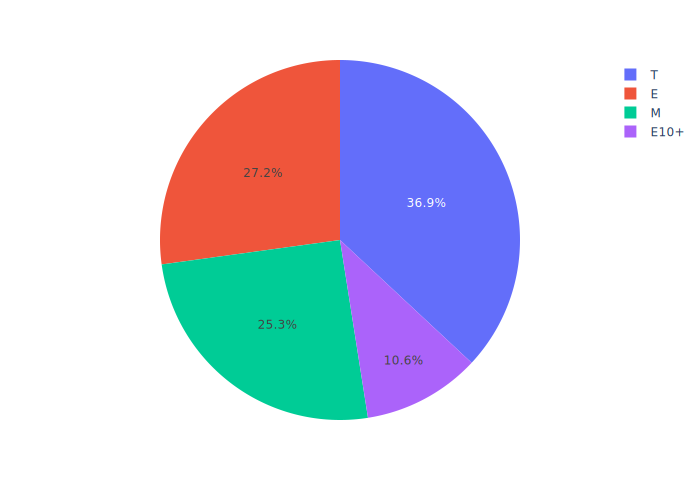

In [46]:
jp_rating = data_actual.pivot_table(index='rating', values='jp_sales', aggfunc=['count','sum'])
jp_rating.columns = ['number_of_games', 'total_sales']
jp_rating['share'] = jp_rating['total_sales']/ jp_rating['total_sales'].sum()
display(jp_rating.sort_values(by='total_sales', ascending=False))
fig = px.pie(jp_rating, values=jp_rating['share'], names=jp_rating.index)
fig.show('svg')

**Выводы по Японии**

* Наиболее популярная платформа в Японии - 3DS (48% рынка). Далее идут PS3 (17%), PSV (13%), PS4 (11%), WiiU (8%).

* Самый популярный жанр - Role-Playing (36%). Далее следуют Action (29%), Misc (7%), Fighting (5%) и Shooter (5%).

* Наиболее популярны в Японии игры для тинейджеров (Т) - 37% рынка. Далее идут игры без возрастного ограничения (27%), игры для взрослых (25%) и игры 10+ (11%).

## Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

**H0: средние пользовательские рейтинги платформ Xbox One и PC одинаковые**

**H1: средние пользовательские рейтинги платформ Xbox One и PC отличаются**

In [47]:
xone = data_actual.query('platform == "XOne"').dropna(subset=['user_score'])
pc = data_actual.query('platform == "PC"').dropna(subset=['user_score'])

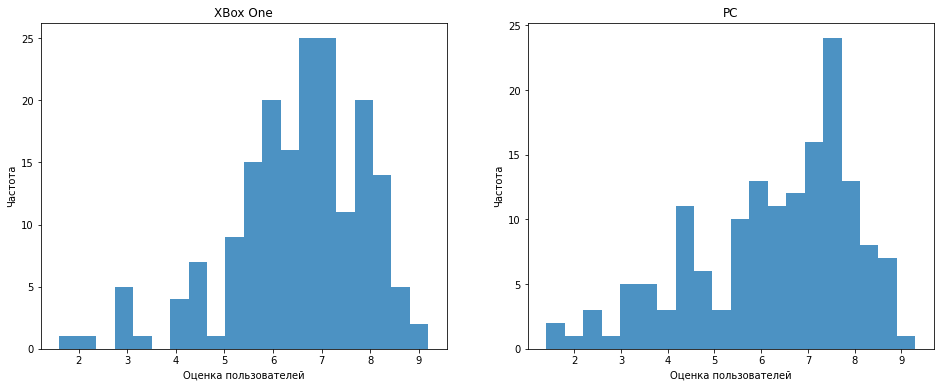

In [48]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.title('XBox One')
plt.hist(xone['user_score'], bins=20, alpha=0.8)
plt.xlabel('Оценка пользователей')
plt.ylabel('Частота')

plt.subplot(1,2,2)
plt.title('PC')
plt.hist(pc['user_score'], bins=20, alpha=0.8)
plt.xlabel('Оценка пользователей')
plt.ylabel('Частота')
plt.show()

In [49]:
xone['user_score'].describe()

count    182.000000
mean       6.521429
std        1.380941
min        1.600000
25%        5.800000
50%        6.800000
75%        7.500000
max        9.200000
Name: user_score, dtype: float64

In [50]:
pc['user_score'].describe()

count    155.000000
mean       6.269677
std        1.742381
min        1.400000
25%        5.300000
50%        6.800000
75%        7.600000
max        9.300000
Name: user_score, dtype: float64

Проводим t-тест с уровнем значимости 0.05. Т.к. стандартные отклонения распределений отличаются, то параметр `equal_var = False`

In [51]:
alpha = 0.05
results = st.ttest_ind(xone['user_score'], pc['user_score'], equal_var = False)
print('pvalue: ', results.pvalue)
if results.pvalue < alpha:
    print('H0 неверна')
else:
    print('H0 верна')

pvalue:  0.14759594013430463
H0 верна


**Вывод** 

Статистически значимой разницы между средними пользовательскими рейтингами платформ XOne и PC не обнаружено.

###  Средние пользовательские рейтинги жанров Action и Sports разные

**H0: средние пользовательские рейтинги жанров Action и Sports одинаковые.**

**H1: средние пользовательские рейтинги жанров Action и Sports разные.**

In [52]:
action = data_actual.query('genre == "Action"').dropna(subset=['user_score'])
sports = data_actual.query('genre == "Sports"').dropna(subset=['user_score'])

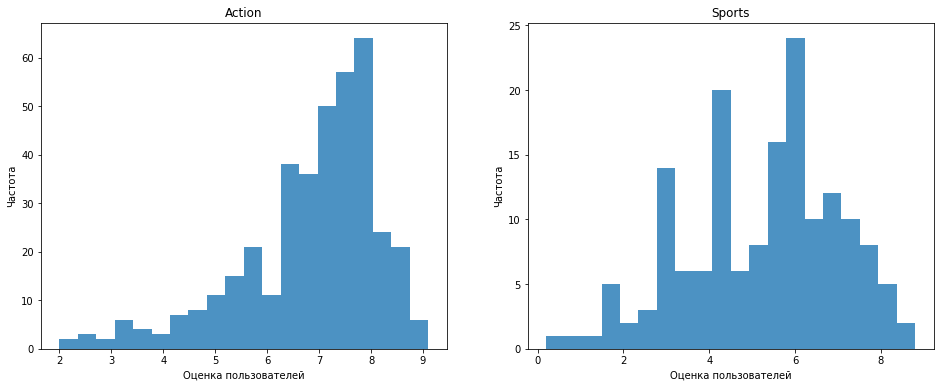

In [53]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.title('Action')
plt.hist(action['user_score'], bins=20, alpha=0.8)
plt.xlabel('Оценка пользователей')
plt.ylabel('Частота')

plt.subplot(1,2,2)
plt.title('Sports')
plt.hist(sports['user_score'], bins=20, alpha=0.8)
plt.xlabel('Оценка пользователей')
plt.ylabel('Частота')
plt.show()

In [54]:
action['user_score'].describe()

count    389.000000
mean       6.837532
std        1.330173
min        2.000000
25%        6.300000
50%        7.100000
75%        7.800000
max        9.100000
Name: user_score, dtype: float64

In [55]:
sports['user_score'].describe()

count    160.000000
mean       5.238125
std        1.783427
min        0.200000
25%        4.100000
50%        5.500000
75%        6.500000
max        8.800000
Name: user_score, dtype: float64

In [56]:
alpha = 0.05
results = st.ttest_ind(action['user_score'], sports['user_score'], equal_var = False)
print('pvalue: ', results.pvalue)
if results.pvalue < alpha:
    print('H0 неверна')
else:
    print('H0 верна')

pvalue:  1.4460039700704318e-20
H0 неверна


**Вывод**

Средние пользовательские рейтинги жанров Action и Sports отличаются.

## Что было сделано

**Предобработку данных осуществили следующими методами:**

* Свели названия столбцов к нижнему регистру, чтобы привести их к стандартной форме.
* Изменили типы значений в столбцах на более подходящие.

**Провели следующие расчеты и анализ:**

* Посчитали общее число продаж в мире и вынесли в отдельный столбец.
* Исследовали количество выпускаемых игр по годам.
* Исследовали количество выпускаемых игр по платформам, определили наиболее популярные платформы и их "продолжительность жизни".
* Определили актуальный период, на основании которого можно строить прогнозы.
* Определили наиболее перспективные платформы.
* Исследовали зависимость продаж от оценок критиков и пользователей.
* Исследовали зависимость продаж от жанра игры.
* Составили портреты пользователей из Северной Америки, Европы и Японии.

**Проверили следующие гипотезы:**

* Гипотеза №1: "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.". Гипотеза оказалась верна.
* Гипотеза №2: "Средние пользовательские рейтинги жанров Action и Sports разные.". Гипотеза оказалась верна.

## Общий вывод

**Общемировые продажи**
1) За актуальный период наибольшие продажи были у игр на PS4, XOne и 3DS. Несмотря на общий нисходящий тренд, эти платформы будут актуальными еще 2-3 года. Игры для PS3 также хорошо продавались, но к концу актуального периода продажи сильно упали, поэтому в дальнейшем нет смысла делать ставку на данную платформу.

2) Продажи игр коррелируют с оценками критиков. Наибольшее внимание стоит уделить играм с высокими оценками.

3) Наиболее прибыльные жанры: Shooter, Sports, Platform, Role-Playing и Racing.

**Специфика регионов**
* Северная Америка и Европа:
 
Наиболее популярные платформы - PS4 и XOne. Наиболее прибыльные жанры: Action, Shooter, Sports, Role-Playing. Лучше всего продаются игры для взрослых (M) и для всех возрастов (E).
 
 * Япония
 
Почти половину рынка занимает платформа 3DS, также популярны платформы от PlayStation. Платформ XBox практически нет. Наиболее популярные жанры: Role-Playing, Action, Misc, Fighting и Shooter. Среди возрастных категория наиболее популярны T, E и M.
 